In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from scipy.stats import norm, skew
from scipy import stats
from datetime import datetime
import calendar

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())
import pandas as pd
airbnb_df = pd.read_csv("AB_NYC_2019.csv")
print(airbnb_df.head())


Saving AB_NYC_2019.csv to AB_NYC_2019 (2).csv
dict_keys(['AB_NYC_2019 (2).csv'])
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_review

In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
len(airbnb_df[airbnb_df.duplicated()])

0

In [ ]:
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Find columns with exactly 1 missing value
cols_with_one_null = airbnb_df.columns[airbnb_df.isna().sum() == 1]

# Display them
print(cols_with_one_null)


Index([], dtype='object')


In [ ]:
airbnb_df.isna().sum()[airbnb_df.isna().sum() > 0]


name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [ ]:
missing_cols = airbnb_df.columns[airbnb_df.isna().sum() != 0]
airbnb_df[missing_cols].head()


name    host_name last_review  \
0                Clean & quiet apt home by the park         John  19-10-2018   
1                             Skylit Midtown Castle     Jennifer  21-05-2019   
2               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth         NaN   
3                   Cozy Entire Floor of Brownstone  LisaRoxanne  05-07-2019   
4  Entire Apt: Spacious Studio/Loft by central park        Laura  19-11-2018   

   reviews_per_month  
0               0.21  
1               0.38  
2                NaN  
3               4.64  
4               0.10

In [ ]:
# Count of missing values per column
missing_count = airbnb_df.isna().sum()

# Percentage of missing values per column
missing_percent = (airbnb_df.isna().sum() / len(airbnb_df)) * 100

# Combine into one table for easy viewing
missing_summary = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
}).sort_values(by='Percentage (%)', ascending=False)

# Show top columns with missing data
print(missing_summary.head(4))


                   Missing Values  Percentage (%)
last_review                 10052           20.56
reviews_per_month           10052           20.56
host_name                      21            0.04
name                           16            0.03


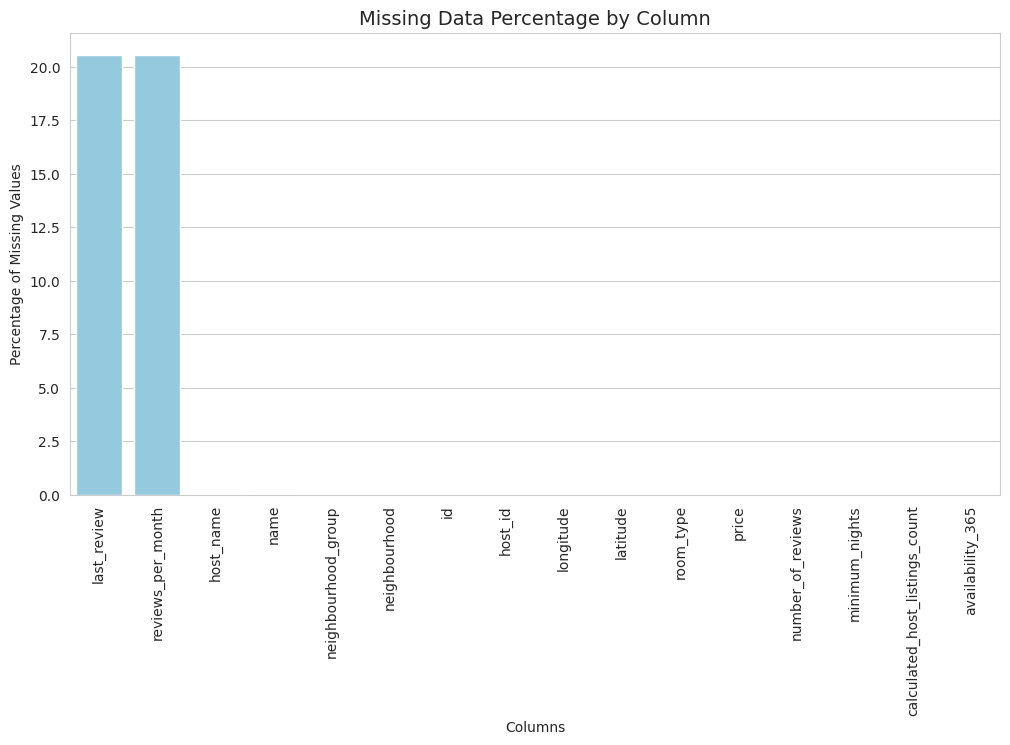

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    x=missing_summary.index,
    y=missing_summary['Percentage (%)'],
    color='skyblue'
)
plt.title('Missing Data Percentage by Column', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.show()


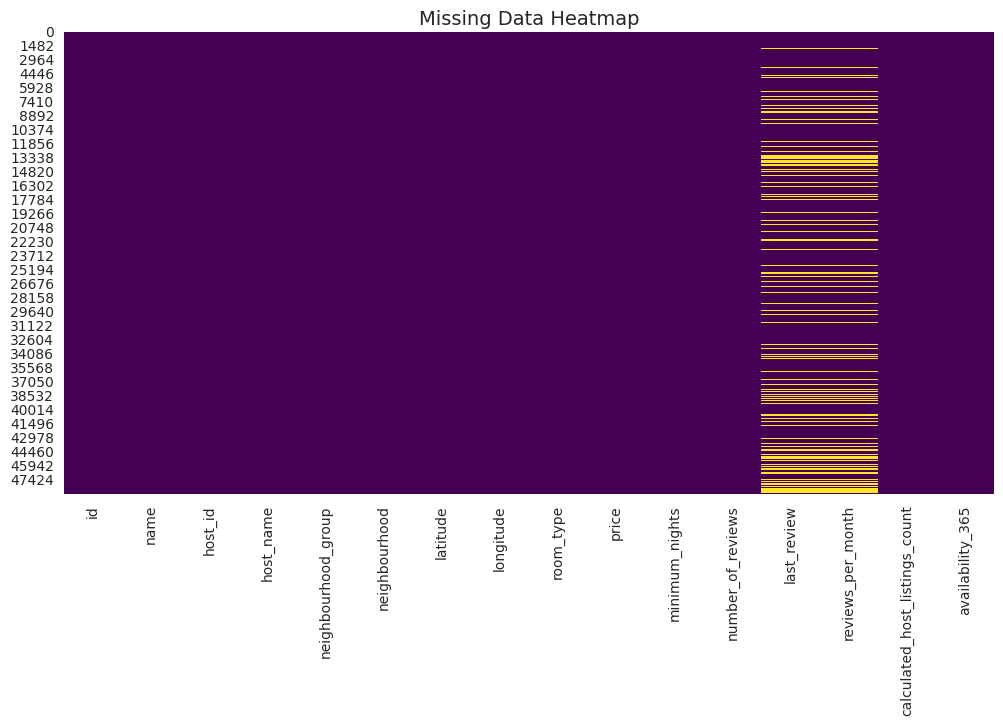

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(airbnb_df.isna(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap', fontsize=14)
plt.show()

In [ ]:
print(f'Features :  {airbnb_df.columns.to_list()}')

Features :  ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


/tmp/ipython-input-2036497457.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipython-input-2036497457.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



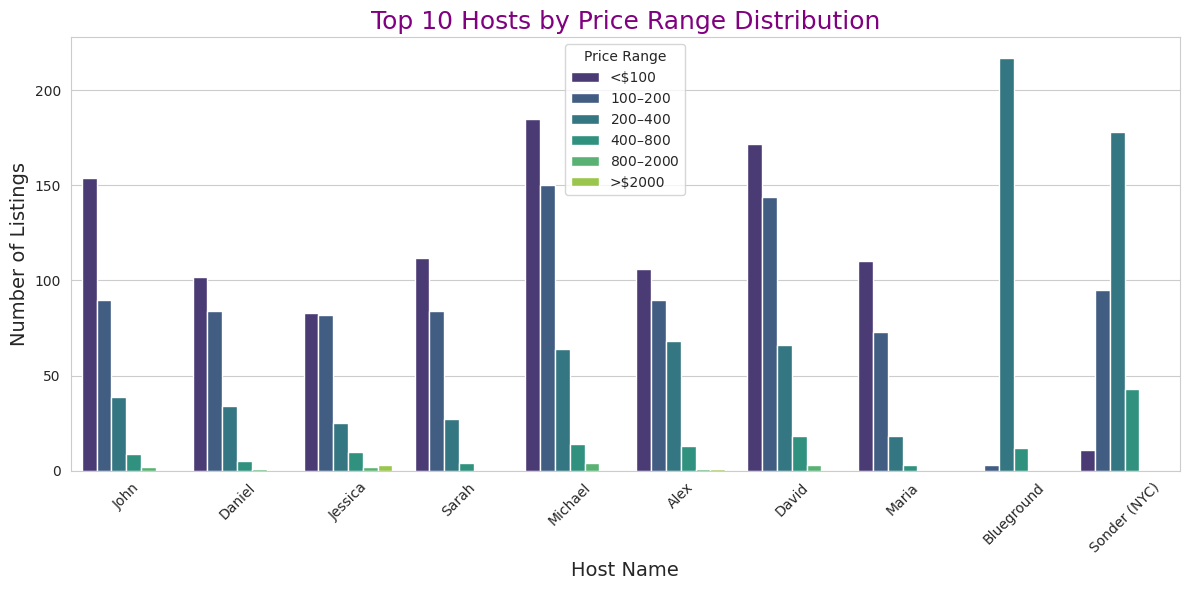

In [ ]:
# Define price bins
price_bins = [0, 100, 200, 400, 800, 2000, airbnb_df['price'].max()]
price_labels = ['<$100', '$100–$200', '$200–$400', '$400–$800', '$800–$2000', '>$2000']

# Create a new column for price range
airbnb_df['price_range'] = pd.cut(airbnb_df['price'], bins=price_bins, labels=price_labels, include_lowest=True)
# Define revenue bins
revenue_bins = [0, 1000, 5000, 10000, 20000, 50000, airbnb_df['revenue'].max()]
revenue_labels = ['<$1K', '$1K–$5K', '$5K–$10K', '$10K–$20K', '$20K–$50K', '>$50K']

# Create a new column for revenue range
airbnb_df['revenue_range'] = pd.cut(airbnb_df['revenue'], bins=revenue_bins, labels=revenue_labels, include_lowest=True)

price_group = (
    airbnb_df.groupby(['host_name', 'price_range'])
    .size()
    .reset_index(name='listing_count')
    .sort_values(['listing_count'], ascending=False)
)
price_group.head(10)

revenue_group = (
    airbnb_df.groupby(['host_name', 'revenue_range'])['revenue']
    .mean()
    .reset_index()
    .sort_values('revenue', ascending=False)
)
revenue_group.head(10)

import seaborn as sns
import matplotlib.pyplot as plt

top_hosts = airbnb_df['host_name'].value_counts().head(10).index
top_hosts_df = airbnb_df[airbnb_df['host_name'].isin(top_hosts)]

plt.figure(figsize=(12,6))
sns.countplot(data=top_hosts_df, x='host_name', hue='price_range', palette='viridis')
plt.title('Top 10 Hosts by Price Range Distribution', fontsize=18, color='purple')
plt.xlabel('Host Name', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()

import plotly.express as px

fig = px.bar(
    revenue_group,
    x='revenue',
    y='host_name',
    color='revenue_range',
    orientation='h',
    title='Host Revenue by Range',
    color_discrete_sequence=px.colors.sequential.Magma
)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()





In [ ]:
revenue_group = (
    airbnb_df.groupby(['host_name', 'revenue_range'])['revenue']
    .mean()
    .reset_index()
    .sort_values('revenue', ascending=False)
)
revenue_group.head(10)



/tmp/ipython-input-830462360.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



host_name revenue_range       revenue
2333            Alissa         >$50K  1.720000e+06
33533            Kevin         >$50K  1.472380e+06
55049           Sandra         >$50K  1.342500e+06
38399  Luxury Property         >$50K  1.095000e+06
25823             Indi         >$50K  8.760000e+05
26885             Jack         >$50K  7.562499e+05
39683            Manon         >$50K  7.300000e+05
11279             Chen         >$50K  7.300000e+05
27251            James         >$50K  5.880974e+05
64571         Virginie         >$50K  5.339500e+05

In [ ]:
airbnb_df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'],errors = 'coerce')
airbnb_df['last_review'].head()


/tmp/ipython-input-3837654865.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [ ]:
total_reviews = airbnb_df['number_of_reviews'].sum()
print(f'Total number of reviews: {total_reviews}')
avg_reviews = airbnb_df['number_of_reviews'].mean()
print(f'Average number of reviews: {avg_reviews}')
zero_review=airbnb_df[airbnb_df['number_of_reviews'] == 0]
print(f'Number of properties with zero reviews: {len(zero_review)}')
airbnb_df['reviews_per_month'] = pd.to_numeric(airbnb_df['reviews_per_month'], errors='coerce')
reviews_per_month = airbnb_df['reviews_per_month'].sum()


Total number of reviews: 1138005
Average number of reviews: 23.274465691788528
Number of properties with zero reviews: 10052


In [ ]:
len(airbnb_df[airbnb_df['number_of_reviews'] == 0])
zero_review=airbnb_df[airbnb_df['number_of_reviews'] == 0]
len(zero_review)


10052

In [ ]:
review_by_area = airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False)
print(review_by_area)



neighbourhood_group
Brooklyn         486574
Manhattan        454569
Queens           156950
Bronx             28371
Staten Island     11541
Name: number_of_reviews, dtype: int64


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [ ]:
airbnb_df['reviews_per_month'] = pd.to_numeric(airbnb_df['reviews_per_month'], errors='coerce')
reviews_per_month = airbnb_df['reviews_per_month'].sum()
print(reviews_per_month)

53340.04


In [ ]:
airbnb_df.fillna({'name':'Not Known'}, inplace=True)
airbnb_df['host_name'].fillna('Not Known', inplace=True)
airbnb_df['reviews_per_month'].fillna(0, inplace=True)
airbnb_df['name'].isna().sum()

print(airbnb_df['host_name'].isna().sum())
print(airbnb_df['reviews_per_month'].isna().sum())


0
0


/tmp/ipython-input-765901778.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-765901778.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:

airbnb_df.fillna({
    'name': 'Not Known',
    'host_name': 'Not Known',
    'reviews_per_month': 0
}, inplace=True)
airbnb_df.head().isna().sum()



id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       1
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_range                       0
dtype: int64

In [ ]:
median= airbnb_df['price'].median()
print(median)
airbnb_df['price'].fillna(median, inplace=True)
airbnb_df['price'].replace(0, median, inplace=True)
airbnb_df['price'].isna().sum()

106.0


/tmp/ipython-input-3261733203.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3261733203.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

np.int64(0)

In [ ]:
airbnb_df['number_of_bookings']= airbnb_df['availability_365']/airbnb_df['minimum_nights'].astype(int)
airbnb_df['revenue']= airbnb_df['price']*airbnb_df['number_of_bookings']
airbnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaT   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

  price_range  number_of_bookings  revenue  
0   $100–$200          365.000000  54385.0  
1   $200–$400          355.000000  79875.0  
2   $100–$200          121.666667  18250.0  
3       <$100          194.000000  17266.0  
4       <$100            0.000000      0.0

In [ ]:
host_revenue = airbnb_df.groupby(['host_id', 'host_name'])['revenue'].sum().reset_index()
average_revenue_per_host = host_revenue['revenue'].mean()
print(f'Average Revenue per Host: ${average_revenue_per_host:.2f}')


Average Revenue per Host: $11264.34


 Median Revenue by Neighbourhood Group:
  neighbourhood_group      revenue
4       Staten Island  5661.000000
0               Bronx  3492.000000
3              Queens  2946.500000
2           Manhattan   840.000000
1            Brooklyn   531.666667


/tmp/ipython-input-761104880.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_revenue_by_neighbourhood, x='neighbourhood_group', y='revenue', palette='mako')


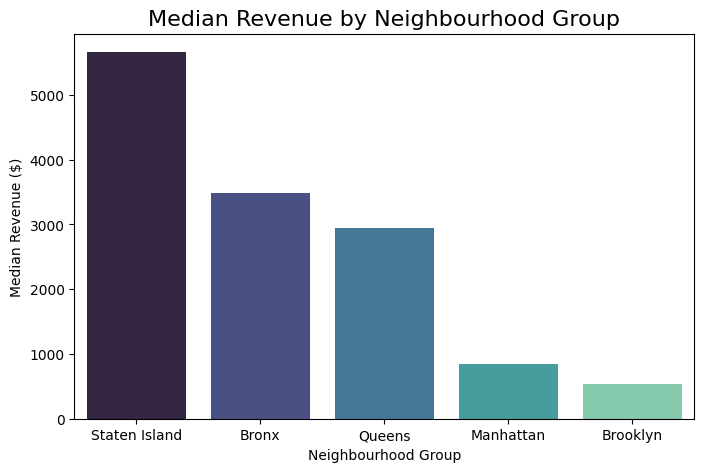

In [ ]:
median_revenue_by_neighbourhood = (
    airbnb_df.groupby('neighbourhood_group')['revenue']
    .median()
    .reset_index()
    .sort_values('revenue', ascending=False)
)

print(" Median Revenue by Neighbourhood Group:")
print(median_revenue_by_neighbourhood)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=median_revenue_by_neighbourhood, x='neighbourhood_group', y='revenue', palette='mako')
plt.title("Median Revenue by Neighbourhood Group", fontsize=16)
plt.ylabel("Median Revenue ($)")
plt.xlabel("Neighbourhood Group")
plt.show()



In [ ]:
airbnb_df.groupby('neighbourhood_group')[['price','number_of_reviews','reviews_per_month','calculated_host_listings_count','revenue']].agg(['mean','median','sum','max','min'])

price                            number_of_reviews  \
                           mean median      sum    max min              mean   
neighbourhood_group                                                            
Bronx                 87.593951   65.0    95565   2500  10         26.004583   
Brooklyn             124.430661   90.0  2501554  10000  10         24.202845   
Manhattan            196.880707  150.0  4264633  10000  10         20.985596   
Queens                99.517649   75.0   563867  10000  10         27.700318   
Staten Island        114.812332   75.0    42825   5000  13         30.941019   

                                             ...  \
                    median     sum  max min  ...   
neighbourhood_group                          ...   
Bronx                  9.0   28371  321   0  ...   
Brooklyn               6.0  486574  488   0  ...   
Manhattan              4.0  454569  607   0  ...   
Queens                 7.0  156950  629   0  ...   
Staten Island         12.0   11541  333   0  ...   

                    calculated_host_listings_count                          \
                                              mean median     sum  max min   
neighbourhood_group                                                          
Bronx                                     2.233731    1.0    2437   37   1   
Brooklyn                                  2.284371    1.0   45925  232   1   
Manhattan                                12.791330    1.0  277073  327   1   
Queens                                    4.060184    1.0   23005  103   1   
Staten Island                             2.319035    1.0     865    8   1   

                          revenue                                             
                             mean       median           sum        max  min  
neighbourhood_group                                                           
Bronx                 8891.118795  3492.000000  9.700211e+06   223750.0  0.0  
Brooklyn              6553.099763   531.666667  1.317435e+08  2920000.0  0.0  
Manhattan            10361.374963   840.000000  2.244377e+08  2730000.0  0.0  
Queens                8876.719632  2946.500000  5.029549e+07   730000.0  0.0  
Staten Island        15419.224354  5661.000000  5.751371e+06  1720000.0  0.0  

[5 rows x 25 columns]

In [ ]:
airbnb_df.groupby(['neighbourhood_group','neighbourhood','room_type'])[['price','number_of_reviews','reviews_per_month','calculated_host_listings_count','revenue']].agg(['mean','median','sum','max','min'])

price               \
                                                         mean median   sum   
neighbourhood_group neighbourhood room_type                                  
Bronx               Allerton      Entire home/apt  123.062500   95.0  1969   
                                  Private room      65.769231   49.0  1710   
                    Baychester    Entire home/apt   90.333333   95.0   271   
                                  Private room      64.250000   64.5   257   
                    Belmont       Entire home/apt  228.666667  247.0   686   
...                                                       ...    ...   ...   
Staten Island       West Brighton Private room      68.538462   55.0   891   
                    Westerleigh   Entire home/apt  103.000000  103.0   103   
                                  Private room      40.000000   40.0    40   
                    Willowbrook   Entire home/apt  249.000000  249.0   249   
                    Woodrow       Entire home/apt  700.000000  700.0   700   

                                                            number_of_reviews  \
                                                   max  min              mean   
neighbourhood_group neighbourhood room_type                                     
Bronx               Allerton      Entire home/apt  450   49         54.000000   
                                  Private room     142   33         36.115385   
                    Baychester    Entire home/apt  101   75         95.333333   
                                  Private room      75   53          6.000000   
                    Belmont       Entire home/apt  299  140         32.000000   
...                                                ...  ...               ...   
Staten Island       West Brighton Private room     200   37         27.076923   
                    Westerleigh   Entire home/apt  103  103          1.000000   
                                  Private room      40   40         17.000000   
                    Willowbrook   Entire home/apt  249  249          9.000000   
                    Woodrow       Entire home/apt  700  700          0.000000   

                                                                        ...  \
                                                  median  sum  max min  ...   
neighbourhood_group neighbourhood room_type                             ...   
Bronx               Allerton      Entire home/apt   29.5  864  271   0  ...   
                                  Private room      15.0  939  187   0  ...   
                    Baychester    Entire home/apt   69.0  286  206  11  ...   
                                  Private room       6.0   24   12   0  ...   
                    Belmont       Entire home/apt   15.0   96   71  10  ...   
...                                                  ...  ...  ...  ..  ...   
Staten Island       West Brighton Private room      29.0  352   64   0  ...   
                    Westerleigh   Entire home/apt    1.0    1    1   1  ...   
                                  Private room      17.0   17   17  17  ...   
                    Willowbrook   Entire home/apt    9.0    9    9   9  ...   
                    Woodrow       Entire home/apt    0.0    0    0   0  ...   

                                                  calculated_host_listings_count  \
                                                                            mean   
neighbourhood_group neighbourhood room_type                                        
Bronx               Allerton      Entire home/apt                       2.437500   
                                  Private room                          2.961538   
                    Baychester    Entire home/apt                       1.666667   
                                  Private room                          1.750000   
                    Belmont       Entire home/apt                       2.333333   
...                                              

In [ ]:
price_range = airbnb_df.groupby('neighbourhood')['price'].agg(['min', 'max']).reset_index()
price_range.sort_values('max', ascending=False).head(10)
max_price = airbnb_df['price'].max()
max_price_rows = airbnb_df[airbnb_df['price'] == max_price]
total_reviews = max_price_rows['number_of_reviews'].sum()
print(f"Total reviews for listings with maximum price: {total_reviews}")

# 1. Filter the DataFrame for the maximum price listings
df_max_reviews = airbnb_df[airbnb_df['price'] == airbnb_df['price'].max()] \
    .groupby('neighbourhood_group')[['reviews_per_month', 'number_of_bookings']] \
    .sum() \
    .reset_index() \
    .sort_values('reviews_per_month', ascending=False)

# 2. Store the maximum price value in a variable
max_price = airbnb_df['price'].max()

# 3. Print the maximum price to the console
print(f'Maximum Price for each Group is {max_price}')



Total reviews for listings with maximum price: 7
Maximum Price for each Group is 10000


In [ ]:
airbnb_df_max_reviews = airbnb_df[airbnb_df['price'] == airbnb_df['price'].max()].groupby('neighbourhood_group')[[
    'reviews_per_month','number_of_bookings']].sum().reset_index().sort_values(
        'reviews_per_month', ascending = False)
max_price = airbnb_df['price'].max()
print(f'Maximum Price for each Group is {max_price}')
airbnb_df_max_reviews

Maximum Price for each Group is 10000


neighbourhood_group  reviews_per_month  number_of_bookings
0            Brooklyn               0.16            0.000000
2              Queens               0.04            0.000000
1           Manhattan               0.00            2.766667

In [ ]:
airbnb_df.groupby('neighbourhood_group')['room_type'].unique()

neighbourhood_group
Bronx            [Private room, Entire home/apt, Shared room]
Brooklyn         [Private room, Entire home/apt, Shared room]
Manhattan        [Entire home/apt, Private room, Shared room]
Queens           [Private room, Entire home/apt, Shared room]
Staten Island    [Private room, Entire home/apt, Shared room]
Name: room_type, dtype: object

In [ ]:
airbnb_df_between_max_min = (
    airbnb_df[airbnb_df['price'].between(airbnb_df['price'].min(), airbnb_df['price'].max())]
    .groupby('neighbourhood_group')[['reviews_per_month', 'number_of_bookings']]
    .sum()
    .reset_index()
    .sort_values('reviews_per_month', ascending=False)
)
print(f"Price range of the group is {airbnb_df['price'].min()} - {airbnb_df['price'].max()}")
airbnb_df_between_max_min

Price range of the group is 10 - 10000


neighbourhood_group  reviews_per_month  number_of_bookings
2           Manhattan           21158.08       951568.499253
1            Brooklyn           21104.98       930837.914972
3              Queens            8879.05       493644.782971
0               Bronx            1609.94       104075.118226
4       Staten Island             587.99        40952.954253

In [ ]:
avg_reviews = airbnb_df['reviews_per_month'].mean()
print(f"Average reviews per month across all listings: {avg_reviews:.2f}")

airbnb_df['engagement_level'] = airbnb_df['reviews_per_month'].apply(
    lambda x: 'Low' if x < 0.5 else ('Medium' if x < 2 else 'High')
)
airbnb_df.groupby('engagement_level')['reviews_per_month'].agg(['mean', 'count'])
airbnb_df.groupby(['neighbourhood_group', 'engagement_level'])['reviews_per_month'].mean().reset_index()


Average reviews per month across all listings: 1.09


neighbourhood_group engagement_level  reviews_per_month
0                Bronx             High           3.559104
1                Bronx              Low           0.116446
2                Bronx           Medium           1.156215
3             Brooklyn             High           3.481340
4             Brooklyn              Low           0.123746
5             Brooklyn           Medium           1.088044
6            Manhattan             High           3.624071
7            Manhattan              Low           0.110130
8            Manhattan           Medium           1.078336
9               Queens             High           4.108386
10              Queens              Low           0.117631
11              Queens           Medium           1.143011
12       Staten Island             High           3.569316
13       Staten Island              Low           0.115678
14       Staten Island           Medium           1.135725

In [ ]:
airbnb_df_above_avg_reviews = airbnb_df[(airbnb_df['reviews_per_month']> airbnb_df['reviews_per_month'].mean()) &
    (airbnb_df['price'] > airbnb_df['price'].min()) & (airbnb_df['price'] < airbnb_df['price'].max())].groupby(
    'neighbourhood_group')[['reviews_per_month','number_of_bookings']].sum().reset_index().sort_values(
        'reviews_per_month', ascending = False)
avg = airbnb_df['reviews_per_month'].mean()
print(f'Average Review: {avg}')
airbnb_df_above_avg_reviews

Average Review: 1.0909099089886491


neighbourhood_group  reviews_per_month  number_of_bookings
1            Brooklyn           17449.92       506397.107053
2           Manhattan           17432.50       493744.844370
3              Queens            7948.32       294087.628961
0               Bronx            1428.36        56492.428571
4       Staten Island             506.88        22567.250000

In [ ]:
airbnb_df.groupby('engagement_level')['number_of_bookings'].value_counts().reset_index(name = 'Count').head()

engagement_level  number_of_bookings  Count
0             High                 0.0    640
1             High                 1.0     88
2             High               365.0     70
3             High                 3.0     62
4             High                 7.0     60

In [ ]:
airbnb_df_bad = airbnb_df[(airbnb_df['number_of_reviews'] == 0) & (airbnb_df['engagement_level']== 'Low')]
airbnb_df_bad.head()
airbnb_df_bad['price'].mean()

np.float64(192.92956625547154)

In [ ]:
airbnb_df_medium = airbnb_df[(airbnb_df['number_of_reviews'] > 200) & (airbnb_df['engagement_level']== 'Medium')]
airbnb_df_medium.head()
airbnb_df_medium['price'].mean()

np.float64(88.0)

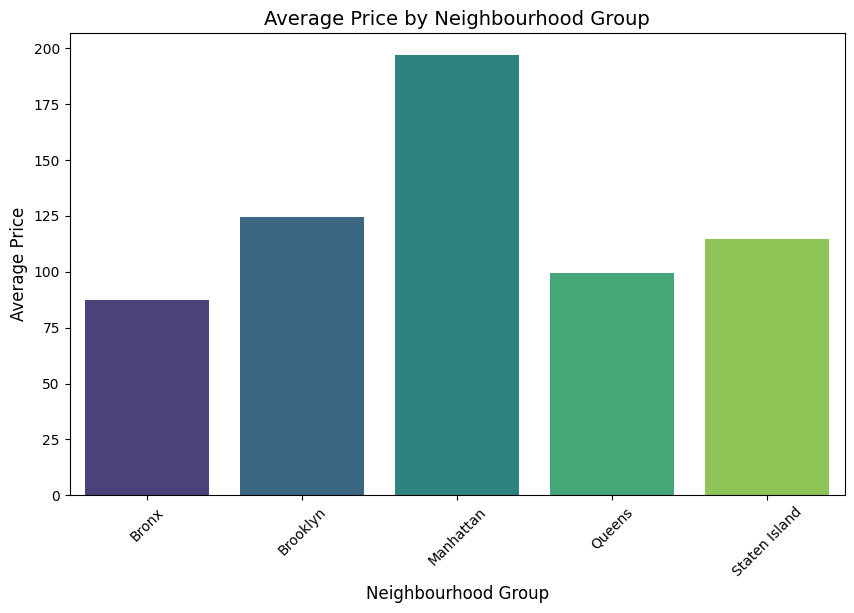

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def create_barplot(data, x_col, y_col, title='', xlabel='', ylabel='', color_palette='coolwarm', rotation=45):
  plt.figure(figsize=(10,6))
  sns.barplot(data=data, x=x_col, y=y_col, hue = x_col, palette=color_palette, legend = False)
  plt.title(title, fontsize=14)
  plt.xlabel(xlabel if xlabel else x_col, fontsize=12)
  plt.ylabel(ylabel if ylabel else y_col, fontsize=12)
  plt.xticks(rotation=rotation)
  plt.show()
avg_price = airbnb_df['price'].mean()
avg_price = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index()
create_barplot(
    data=avg_price,
    x_col='neighbourhood_group',
    y_col='price',
    title='Average Price by Neighbourhood Group',
    xlabel='Neighbourhood Group',
    ylabel='Average Price',
    color_palette='viridis'
)


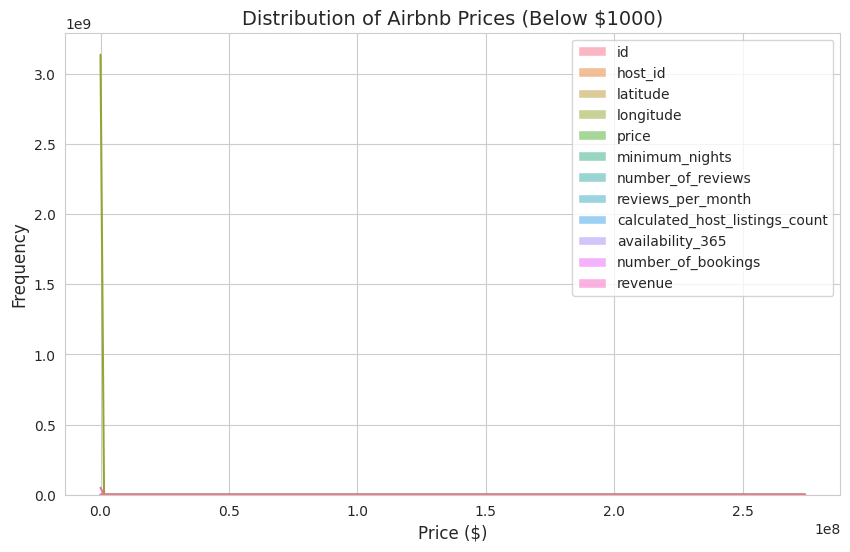

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

airbnb_df[airbnb_df['price'] < 1000]

plt.figure(figsize=(10,6))
sns.histplot(airbnb_df[airbnb_df['price'] < 1000], bins=30, kde=True, color='teal')
plt.title('Distribution of Airbnb Prices (Below $1000)', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


/tmp/ipython-input-679808152.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




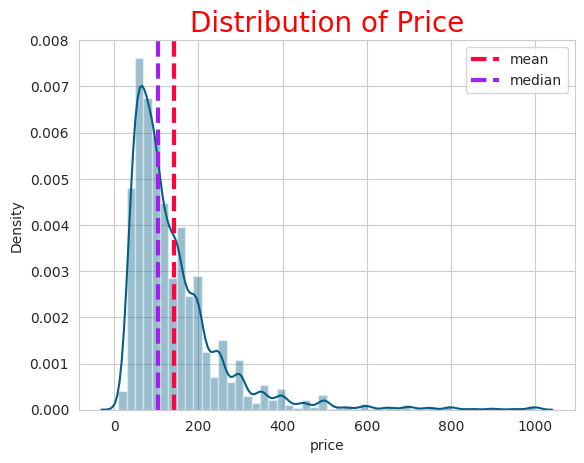

In [ ]:
import plotly.express as px
fig = px.histogram(airbnb_df, x="price");
fig.show()

price_less_than_1000 = airbnb_df[airbnb_df['price'] <= 1000]
col = 'price'
sns.distplot(price_less_than_1000[col], color = '#055E85');
feature = price_less_than_1000[col]
plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
# Add a title to the plot with custom font size and color
plt.title('Distribution of Price', fontsize=20, color='red')

# Show the plot
plt.show()

In [ ]:
q1 = airbnb_df['price'].quantile(0.25)
q3 = airbnb_df['price'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outliers_airbnb_df = airbnb_df[(airbnb_df['price'] < lower_bound) | (airbnb_df['price'] > upper_bound)]
print(f"Number of outliers: {len(outliers_airbnb_df)}")
remove_outliers_airbnb_df = airbnb_df[(airbnb_df['price'] >= lower_bound) & (airbnb_df['price'] <= upper_bound)]


Number of outliers: 2972


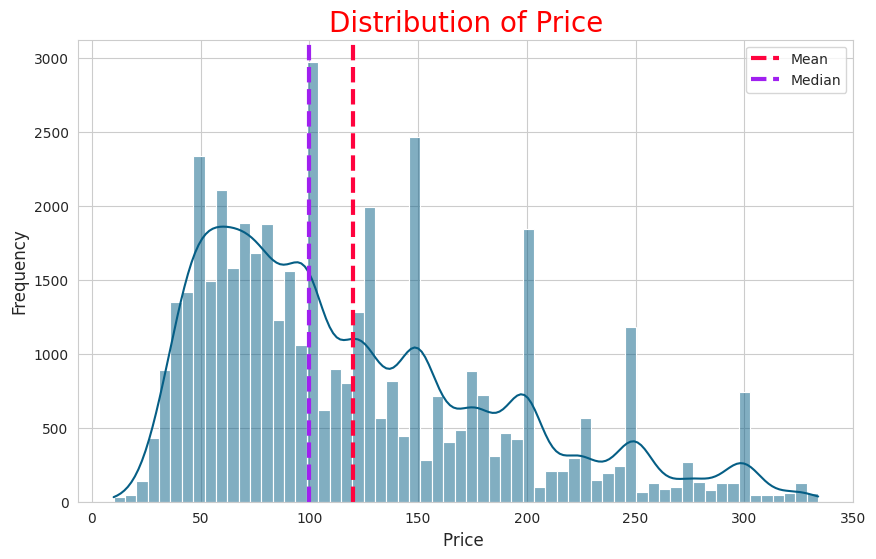

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'price'
feature = remove_outliers_airbnb_df [col]

plt.figure(figsize=(10,6))
sns.histplot(feature, color='#055E85', kde=True)

# Add mean and median lines
plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='Mean')  # Rose-Red
plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='Median')  # Purple

# Add legend, title, and labels
plt.legend(loc='upper right')
plt.title('Distribution of Price', fontsize=20, color='red')
plt.xlabel('Price ', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


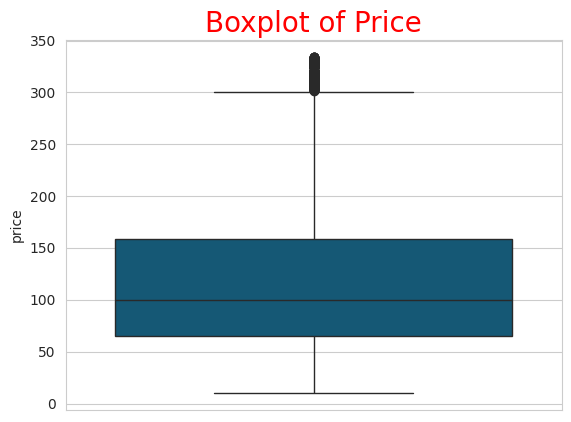

In [ ]:
sns.boxplot(y = 'price', data = remove_outliers_airbnb_df, color = '#055E85').set_title('Boxplot of Price', fontsize=20, color='red');


In [ ]:
neighbourhood_counts = remove_outliers_airbnb_df['neighbourhood_group'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood_group', 'count']

fig = px.pie(
    neighbourhood_counts,
    values='count',
    names='neighbourhood_group',
    title='Distribution of Listings by Neighbourhood Group'
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [ ]:
top_hosts = (
    remove_outliers_airbnb_df['host_name']
    .value_counts()
    .head(10)
    .reset_index()
)
top_hosts.columns = ['host_name', 'listing_count']
print(top_hosts)

fig = px.bar(
    top_hosts,
    x='listing_count',
    y='host_name',
    orientation='h',
    title='Top 10 Hosts by Number of Listings',
    color='listing_count',
    color_continuous_scale='Viridis'
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()



      host_name  listing_count
0       Michael            383
1         David            368
2          John            276
3  Sonder (NYC)            272
4          Alex            253
5         Sarah            221
6        Daniel            212
7         Maria            197
8       Jessica            185
9          Mike            184


In [ ]:
airbnb_df_hosts_compare = (
    airbnb_df.groupby(['host_id', 'host_name'])['calculated_host_listings_count']
    .max()
    .reset_index()
)
airbnb_df_hosts_compare['actual_count'] = airbnb_df['host_name'].value_counts().reindex(airbnb_df_hosts_compare['host_name']).values
airbnb_df_hosts_compare = airbnb_df_hosts_compare.sort_values('actual_count', ascending=False).head(10)
print(airbnb_df_hosts_compare[['host_name', 'actual_count', 'calculated_host_listings_count']])


      host_name  actual_count  calculated_host_listings_count
26856   Michael           417                               1
30462   Michael           417                               1
18453   Michael           417                               1
26899   Michael           417                               1
13614   Michael           417                               1
13607   Michael           417                               1
18363   Michael           417                               1
18356   Michael           417                               1
18352   Michael           417                               2
13682   Michael           417                               1


In [ ]:
# Step 1️⃣: Actual number of listings per host (based on dataset)
actual_counts = (
    airbnb_df['host_name']
    .value_counts()
    .reset_index()
)
actual_counts.columns = ['host_name', 'actual_count']

# Step 2️⃣: Reported number of listings (from Airbnb metadata)
reported_counts = (
    airbnb_df.groupby('host_name')['calculated_host_listings_count']
    .max()
    .reset_index()
    .rename(columns={'calculated_host_listings_count': 'reported_count'})
)

# Step 3️⃣: Merge both datasets
compare_hosts = pd.merge(actual_counts, reported_counts, on='host_name', how='inner')

# Step 4️⃣: Sort by actual listing count and take top 10
compare_hosts = compare_hosts.sort_values('actual_count', ascending=False).head(10)
compare_hosts


host_name  actual_count  reported_count
0       Michael           417              19
1         David           403              12
2  Sonder (NYC)           327             327
3          John           294              47
4          Alex           279               7
5    Blueground           232             232
6         Sarah           227               6
7        Daniel           226               5
8       Jessica           205              11
9         Maria           204               5

In [ ]:
import plotly.express as px

fig = px.bar(
    compare_hosts.melt(id_vars='host_name',
                       value_vars=['actual_count', 'reported_count'],
                       var_name='Count_Type',
                       value_name='Listings'),
    x='Listings',
    y='host_name',
    color='Count_Type',
    barmode='group',
    orientation='h',
    color_discrete_map={'actual_count': '#1f77b4', 'reported_count': '#ff7f0e'},
    title='Top 10 Hosts: Actual vs Reported Number of Listings'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='Number of Listings',
    yaxis_title='Host Name',
    legend_title='Count Type',
    title_x=0.4
)

fig.show()



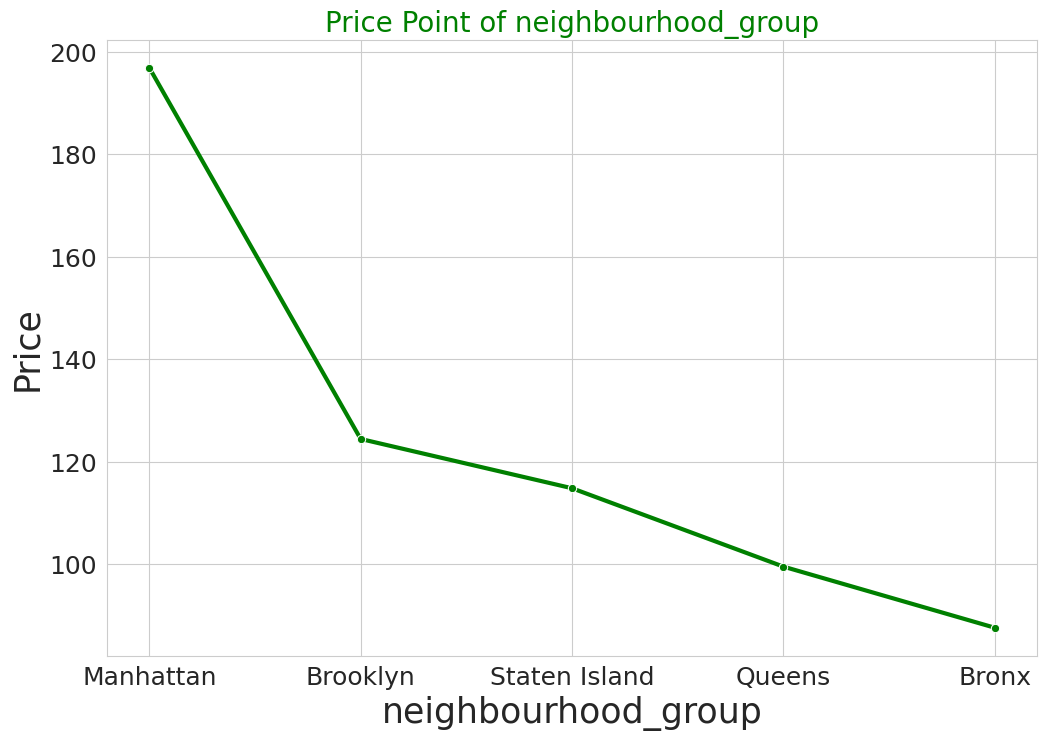

In [ ]:
airbnb_df_avg_price = airbnb_df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values(
    'price',ascending = False)

#line plot
plt.figure(figsize=(12,8));

ax = sns.lineplot(data = airbnb_df_avg_price,x='neighbourhood_group', y = 'price',
  marker= 'o', color = 'green',linewidth=3);

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=18);
# Set the x-label with a font size of 25
ax.set_xlabel("neighbourhood_group", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Price", fontsize=25)
plt.title('Price Point of neighbourhood_group', fontsize=20, color='green');

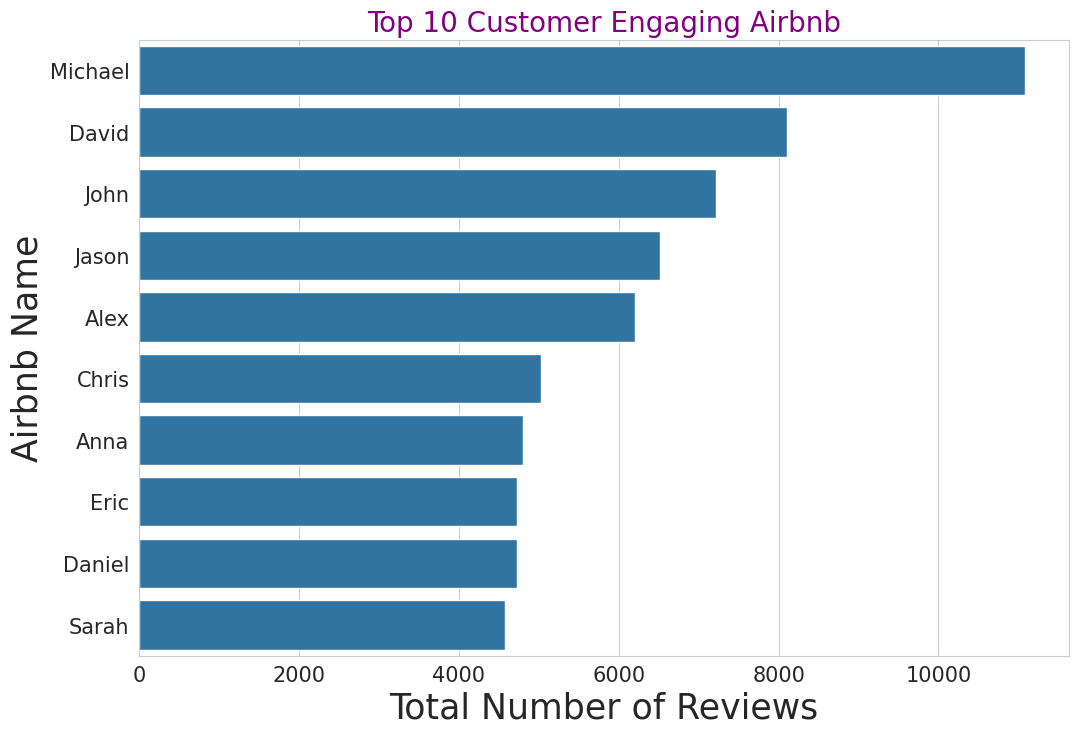

In [ ]:
airbnb_df_engage = airbnb_df.groupby(['host_name'])['number_of_reviews'].sum().reset_index().sort_values(
    'number_of_reviews',ascending = False)[:10]
#barplot
plt.figure(figsize=(12,8));
ax = sns.barplot(data = airbnb_df_engage, y='host_name', x = 'number_of_reviews');

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=15);
# Set the x-label with a font size of 25
ax.set_xlabel("Total Number of Reviews", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Airbnb Name", fontsize=25)
plt.title('Top 10 Customer Engaging Airbnb', fontsize=20, color='purple');

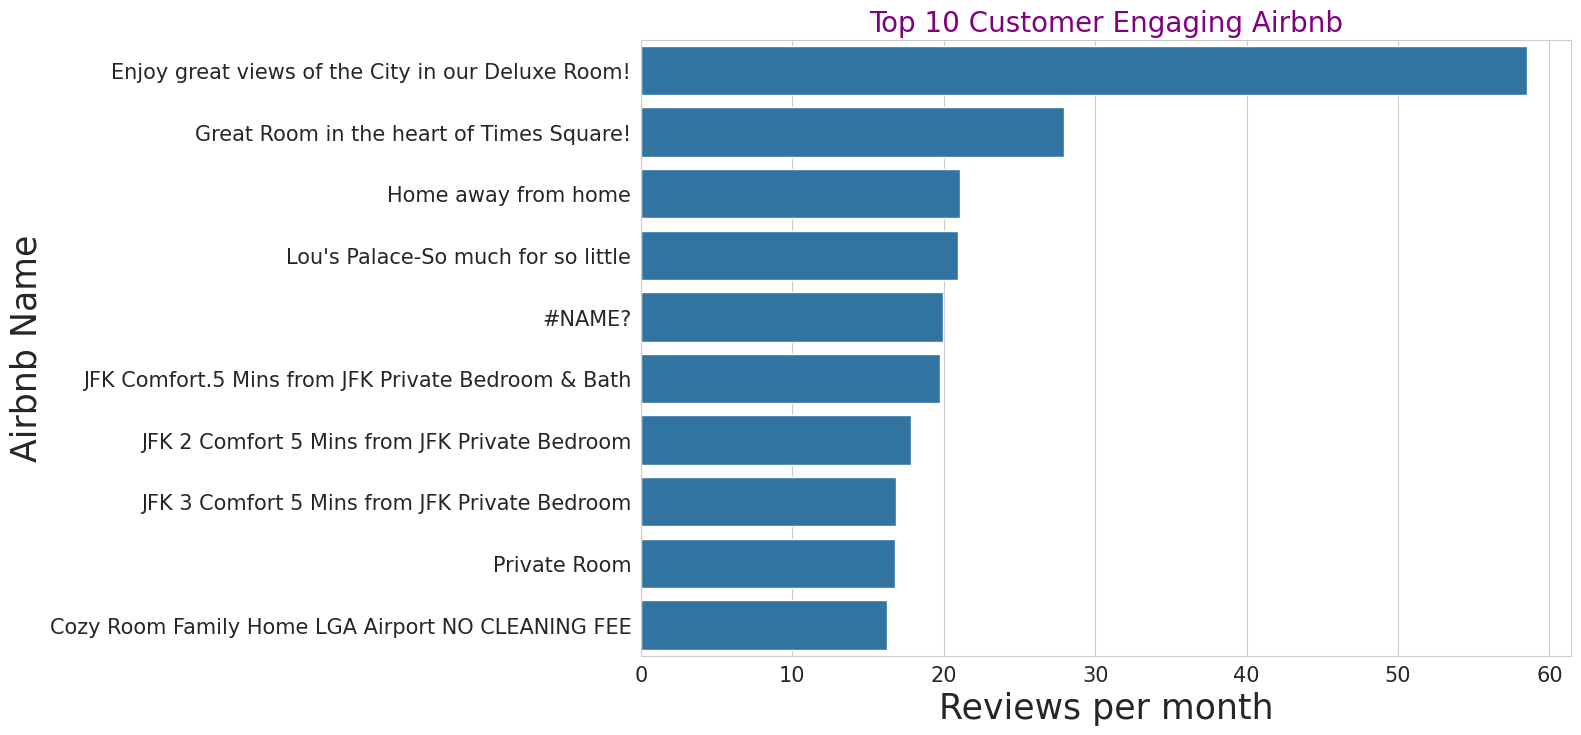

In [ ]:
airbnb_df_engage2 = airbnb_df.groupby(['host_name'])['reviews_per_month'].sum().reset_index().sort_values(
    'reviews_per_month',ascending = False)[:10]
#barplot
plt.figure(figsize=(12,8));
ax = sns.barplot(data = airbnb_df_engage2, y='host_name', x = 'reviews_per_month');

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=15);
# Set the x-label with a font size of 25
ax.set_xlabel("Reviews per month", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Airbnb Name", fontsize=25)
plt.title('Top 10 Customer Engaging Airbnb', fontsize=20, color='purple');

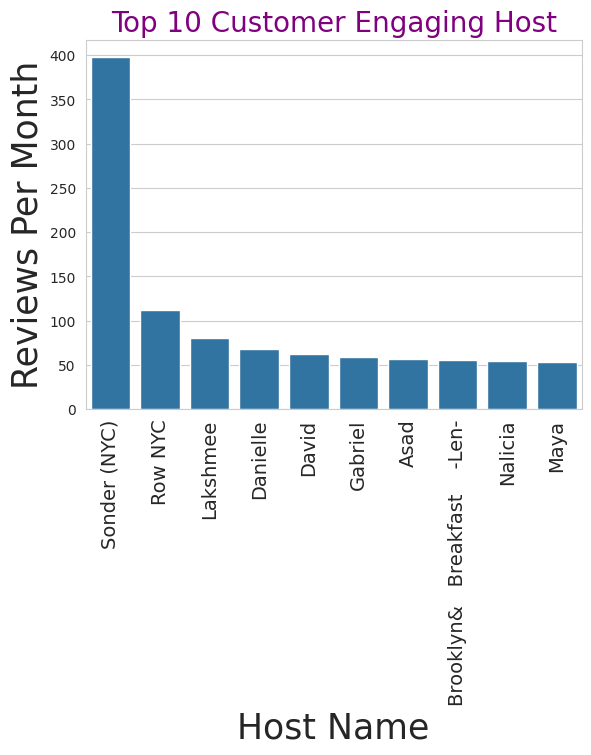

In [ ]:
airbnb_df_popularhost = airbnb_df.groupby(['host_id','host_name'])['reviews_per_month'].sum().reset_index().sort_values(
                            'reviews_per_month',ascending = False)[:10]
#barplot
ax = sns.barplot(x='host_name', y='reviews_per_month', data=airbnb_df_popularhost)
# Set the x-label with a font size of 25
ax.set_xlabel("Host Name", fontsize=25)
plt.xticks(fontsize = 14, rotation = 90);

# Set the y-label with a font size of 25
ax.set_ylabel("Reviews Per Month", fontsize=25)
plt.title('Top 10 Customer Engaging Host', fontsize=20, color='purple');


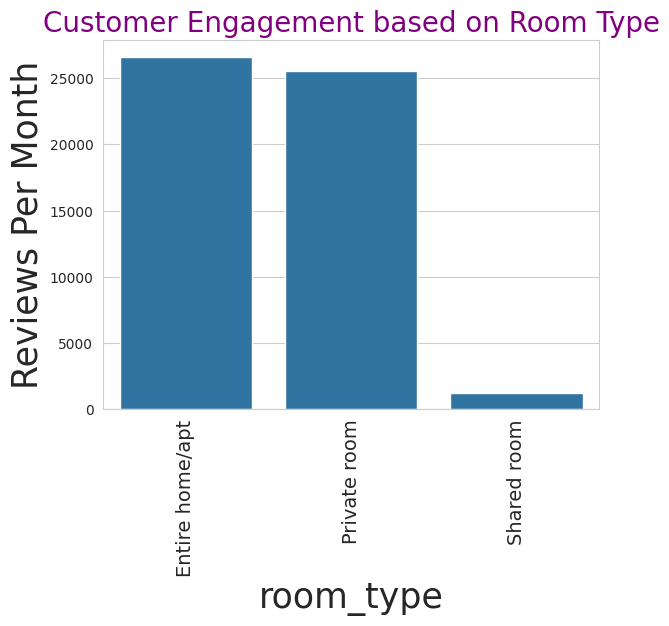

In [ ]:
airbnb_df_room = airbnb_df.groupby('room_type')['reviews_per_month'].sum().reset_index().sort_values(
                            'reviews_per_month',ascending = False)
#barplot
ax = sns.barplot(x='room_type', y='reviews_per_month', data=airbnb_df_room)
# Set the x-label with a font size of 25
ax.set_xlabel("room_type", fontsize=25)
plt.xticks(fontsize = 14, rotation = 90);

# Set the y-label with a font size of 25
ax.set_ylabel("Reviews Per Month", fontsize=25)
plt.title('Customer Engagement based on Room Type', fontsize=20, color='purple');


/tmp/ipython-input-4005204451.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




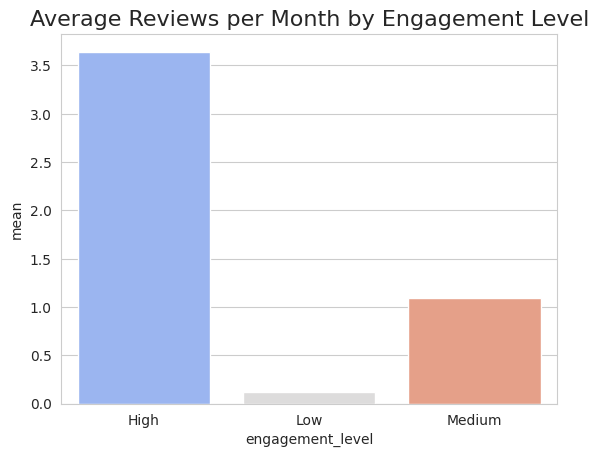

In [ ]:
engagement_summary = airbnb_df.groupby('engagement_level')['reviews_per_month'].agg(['mean','count']).reset_index()
sns.barplot(data=engagement_summary, x='engagement_level', y='mean', palette='coolwarm')
plt.title('Average Reviews per Month by Engagement Level', fontsize=16)
plt.show()

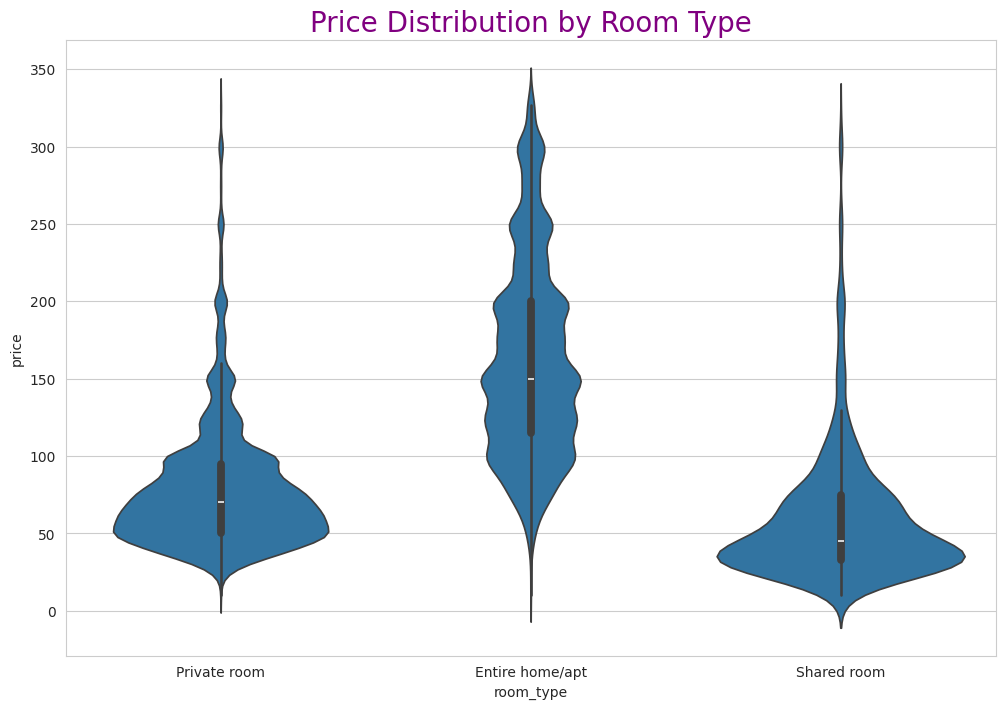

In [ ]:
plt.figure(figsize=(12,8));
ax = sns.violinplot(data = remove_outliers_airbnb_df,x = "room_type", y = "price")
ax.set_title('Price Distribution by Room Type', fontsize=20, color='purple');
plt.show()

/tmp/ipython-input-2439350142.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




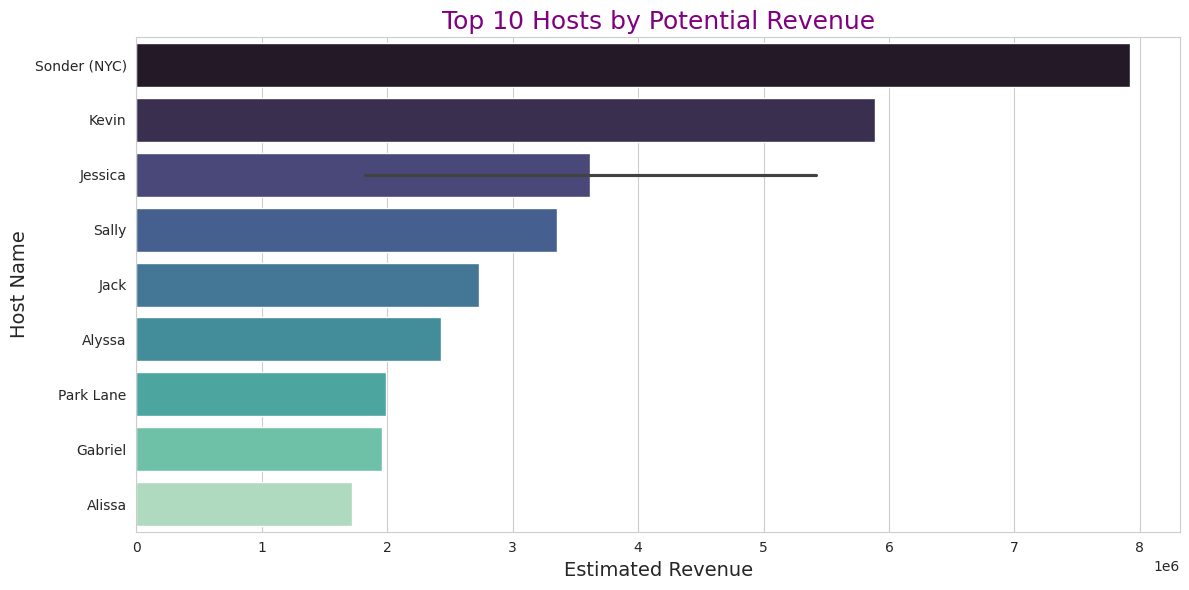

In [ ]:
airbnb_df_revenue = (
    airbnb_df.groupby(['host_name','host_id'])['revenue']
    .sum()
    .reset_index()
    .sort_values('revenue', ascending=False)
    .head(10))
plt.figure(figsize=(12,6))
sns.barplot(data=airbnb_df_revenue, x='revenue', y='host_name', palette='mako')
plt.title('Top 10 Hosts by Potential Revenue', fontsize=18, color='purple')
plt.xlabel('Estimated Revenue', fontsize=14)
plt.ylabel('Host Name', fontsize=14)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1388296367.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




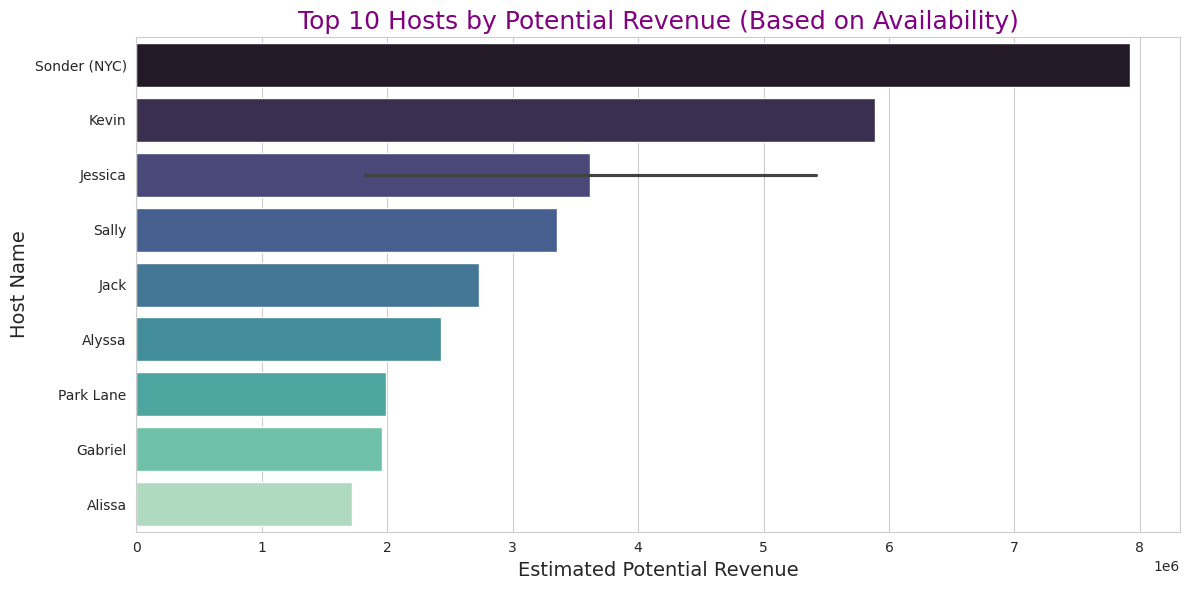

In [ ]:
airbnb_df_revenue = (
    airbnb_df.groupby(['host_id', 'host_name'])['revenue']
    .sum()
    .reset_index()
    .sort_values('revenue', ascending=False)
)

top_hosts_revenue = airbnb_df_revenue.head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_hosts_revenue, x='revenue', y='host_name', palette='mako')
plt.title('Top 10 Hosts by Potential Revenue (Based on Availability)', fontsize=18, color='purple')
plt.xlabel('Estimated Potential Revenue', fontsize=14)
plt.ylabel('Host Name', fontsize=14)
plt.tight_layout()
plt.show()


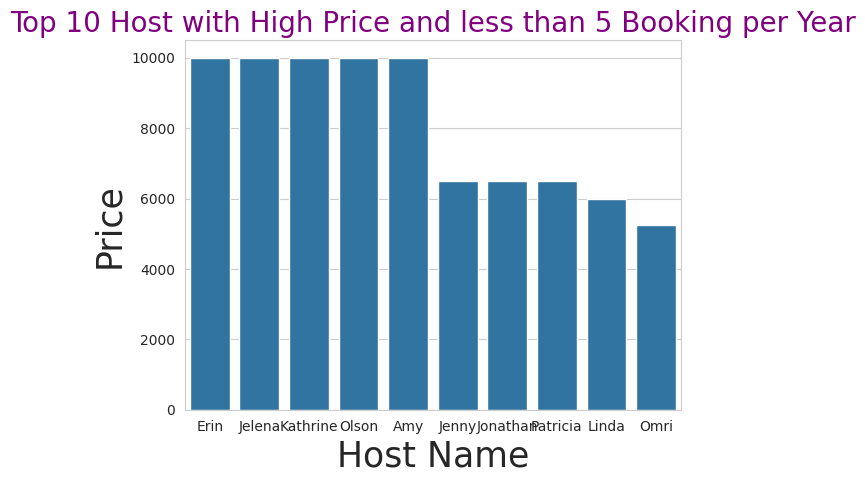

In [ ]:
airbnb_df_non_functional = airbnb_df.groupby(['host_id', 'host_name','number_of_bookings'])[
    'price'].max().reset_index().sort_values('price', ascending = False)
airbnb_df_non_functional = airbnb_df_non_functional[airbnb_df_non_functional['number_of_bookings']<=5]

ax = sns.barplot(data = airbnb_df_non_functional.head(10),x = 'host_name', y = 'price');
# Set the x-label with a font size of 25
ax.set_xlabel("Host Name", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Price", fontsize=25)
plt.title('Top 10 Host with High Price and less than 5 Booking per Year', fontsize=20, color='purple');

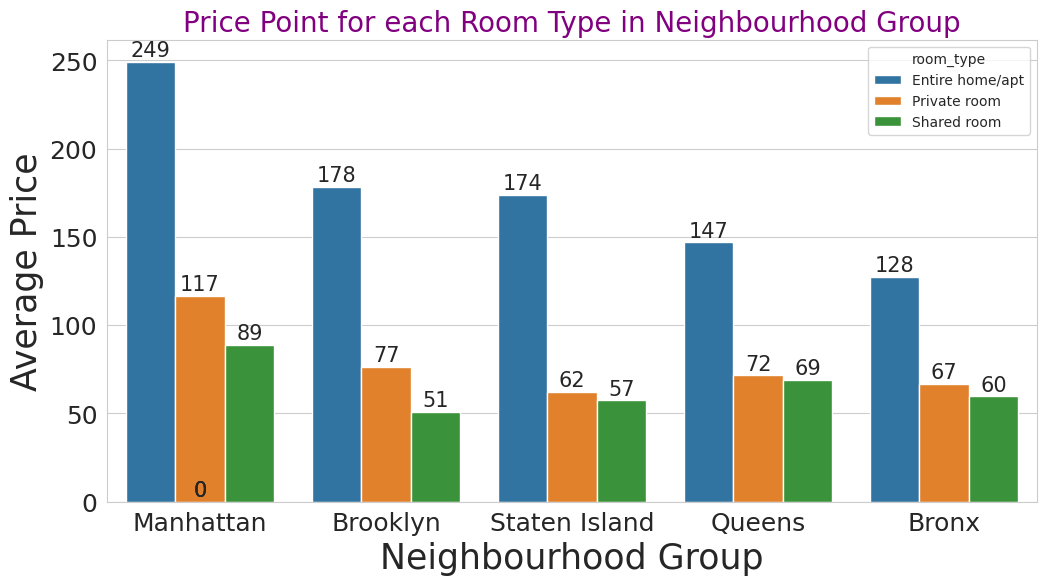

In [ ]:
airbnb_df_avgPrice_roomType = airbnb_df.groupby(['neighbourhood_group','room_type'])[
    'price'].mean().reset_index().sort_values('price',ascending=False)
# Chart - 8 visualization code
plt.figure(figsize=(12,6));
ax = sns.barplot(data= airbnb_df_avgPrice_roomType,x='neighbourhood_group',y='price',hue='room_type');
# Add labels to the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# Set the font size of the tick labels to 12
ax.tick_params(axis='both', which='major', labelsize=18);
# Set the x-label with a font size of 25
ax.set_xlabel("Neighbourhood Group", fontsize=25)

# Set the y-label with a font size of 25
ax.set_ylabel("Average Price", fontsize=25)
plt.title('Price Point for each Room Type in Neighbourhood Group', fontsize=20, color='purple');

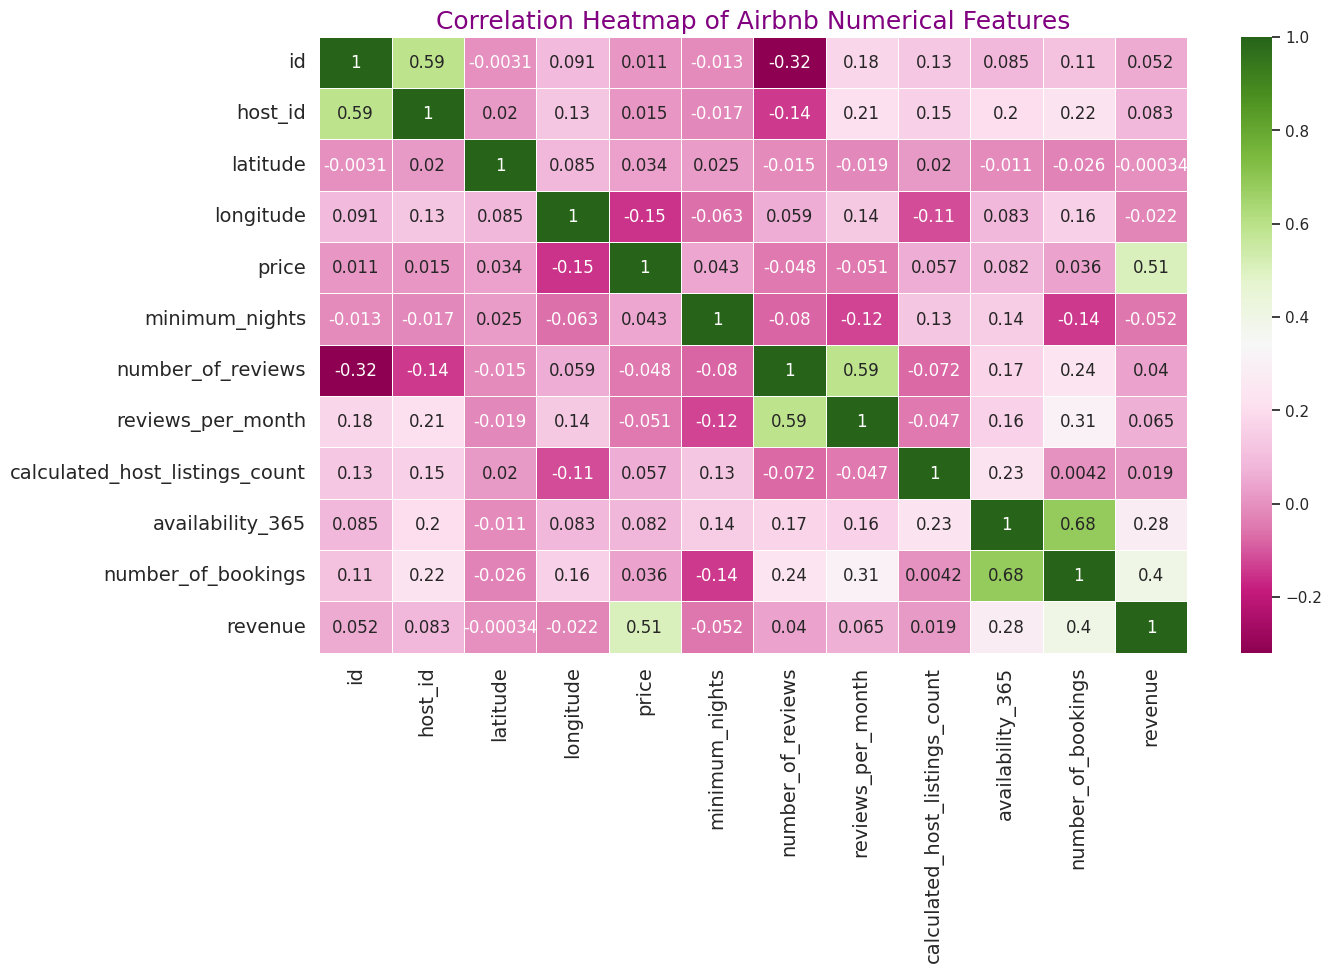

''

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation for numeric columns only
corr = airbnb_df.select_dtypes(include=['float64', 'int64']).corr()

# Set visualization style
sns.set_context('notebook')
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Plot heatmap
sns.heatmap(corr, annot=True, linewidths=0.5, cmap="PiYG")
plt.title('Correlation Heatmap of Airbnb Numerical Features', fontsize=18, color='purple')
plt.show()
;

In [ ]:
# Normalize 'price' and 'number_of_bookings' between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
airbnb_df[['price_scaled', 'bookings_scaled']] = scaler.fit_transform(
    airbnb_df[['price', 'number_of_bookings']]
)

# Create a Host Risk Score (higher = more risk)
# High price increases risk, high bookings reduce risk
airbnb_df['host_risk_score'] = airbnb_df['price_scaled'] - airbnb_df['bookings_scaled']

# Aggregate by host (average risk per host)
host_risk = airbnb_df.groupby(['host_id', 'host_name'])['host_risk_score'].mean().reset_index()

# Top 10 riskiest hosts
top_risky_hosts = host_risk.sort_values('host_risk_score', ascending=False).head(10)
display(top_risky_hosts)


host_id host_name  host_risk_score
16313   20582832  Kathrine         1.000000
7693     5143901      Erin         1.000000
2516     1235070     Olson         0.999900
6315     3906464       Amy         0.997603
26778   72390391    Jelena         0.992420
6985     4382127      Matt         0.966567
15382   18128455       Rum         0.826927
12496   11598359  Jonathan         0.649650
37306  271248669     Jenny         0.644094
20817   35303743  Patricia         0.640791

/tmp/ipython-input-559666880.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




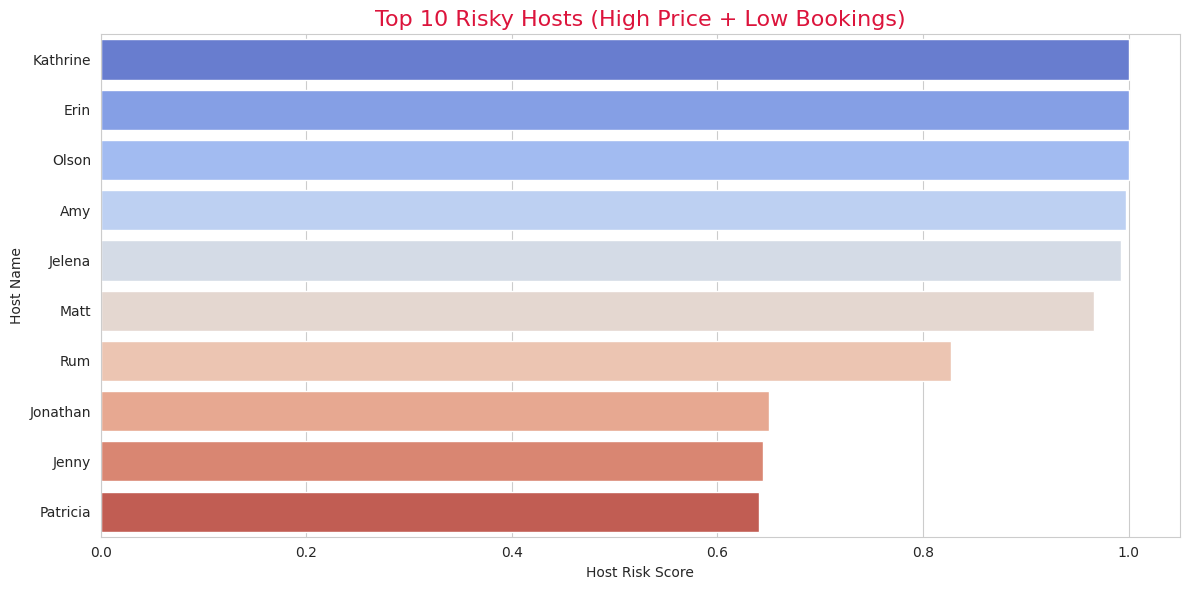

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=top_risky_hosts, x='host_risk_score', y='host_name', palette='coolwarm')
plt.title('Top 10 Risky Hosts (High Price + Low Bookings)', fontsize=16, color='crimson')
plt.xlabel('Host Risk Score')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate ROI for each listing
airbnb_df['ROI'] = airbnb_df['revenue'] / (airbnb_df['availability_365'] + 1)  # +1 to avoid divide by zero

# Group by neighborhood
neighborhood_roi = airbnb_df.groupby('neighbourhood')[['revenue', 'availability_365', 'ROI']].mean().reset_index()

# Top 5 performing neighborhoods
top_roi_neighborhoods = neighborhood_roi.sort_values('ROI', ascending=False).head(5)
display(top_roi_neighborhoods)
fig = px.bar(
    top_roi_neighborhoods,
    x='ROI', y='neighbourhood',
    orientation='h',
    title='Top 5 Neighborhoods by ROI (Revenue / Availability)',
    color='ROI',
    color_continuous_scale='Viridis'
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


neighbourhood        revenue  availability_365         ROI
161      Randall Manor  101334.052632        275.210526  298.381768
21        Breezy Point   21068.333333        100.333333  210.842257
167          Riverdale   40800.372294        160.818182  190.387141
6    Battery Park City   64681.950964        100.328571  186.418401
139           Neponsit   35335.000000        231.000000  136.273948

In [ ]:
# Define revenue tiers based on quantiles
quantiles = airbnb_df['revenue'].quantile([0.33, 0.66]).values
low, high = quantiles[0], quantiles[1]

def revenue_tier(rev):
    if rev <= low:
        return 'Basic'
    elif rev <= high:
        return 'Standard'
    else:
        return 'Luxury'

airbnb_df['revenue_tier'] = airbnb_df['revenue'].apply(revenue_tier)

# Check distribution
airbnb_df['revenue_tier'].value_counts()
fig = px.histogram(
    airbnb_df,
    x='revenue_tier',
    color='revenue_tier',
    color_discrete_map={'Basic':'#A0C4FF', 'Standard':'#FFB703', 'Luxury':'#FB8500'},
    title='Distribution of Listings by Revenue Tier'
)
fig.show()


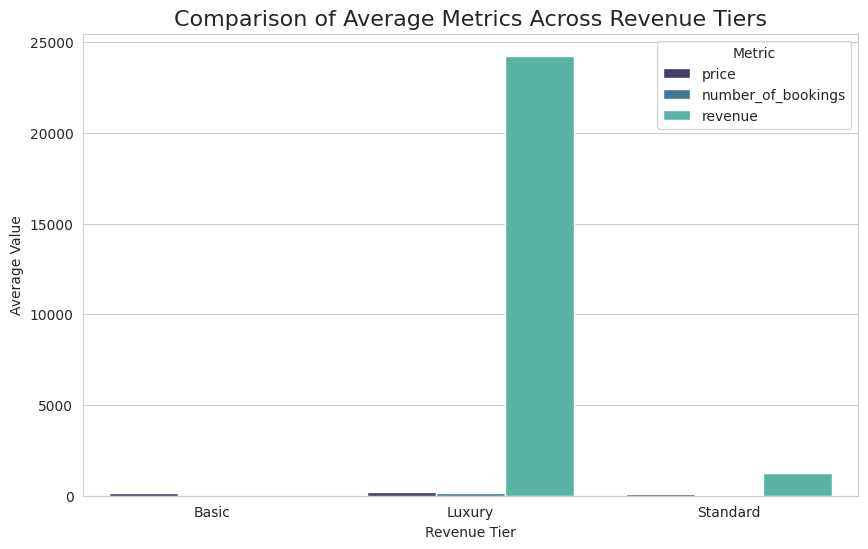

In [ ]:
tier_summary = airbnb_df.groupby('revenue_tier')[['price', 'number_of_bookings', 'revenue']].mean().reset_index()

# Barplot comparison
tier_summary = tier_summary.melt(id_vars='revenue_tier', var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(data=tier_summary, x='revenue_tier', y='Value', hue='Metric', palette='mako')
plt.title('Comparison of Average Metrics Across Revenue Tiers', fontsize=16)
plt.xlabel('Revenue Tier')
plt.ylabel('Average Value')
plt.show()


<Axes: xlabel='price', ylabel='number_of_bookings'>

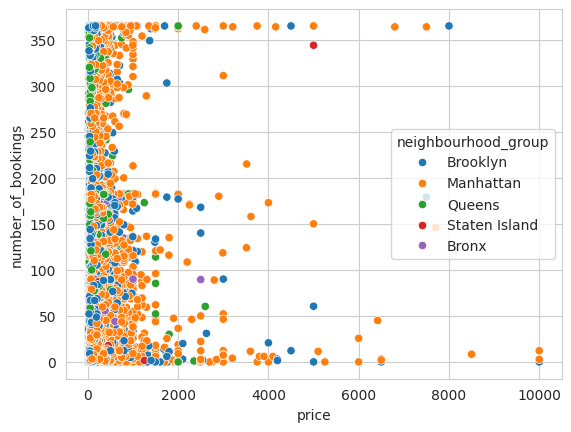

In [ ]:
sns.scatterplot(data=airbnb_df, x='price', y='number_of_bookings', hue='neighbourhood_group')


<Axes: xlabel='last_review'>

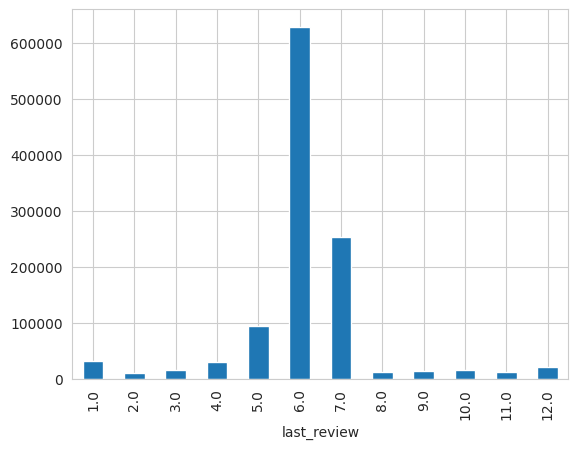

In [ ]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')
airbnb_df.groupby(airbnb_df['last_review'].dt.month)['number_of_reviews'].sum().plot(kind='bar')


In [ ]:
fig = px.scatter_mapbox(
    airbnb_df, lat="latitude", lon="longitude", color="price",
    size="price", hover_name="neighbourhood",
    mapbox_style="carto-positron", zoom=9, height=600,
    title="NYC Airbnb Price Distribution Map"
)
fig.show()


<Axes: xlabel='room_type', ylabel='neighbourhood_group'>

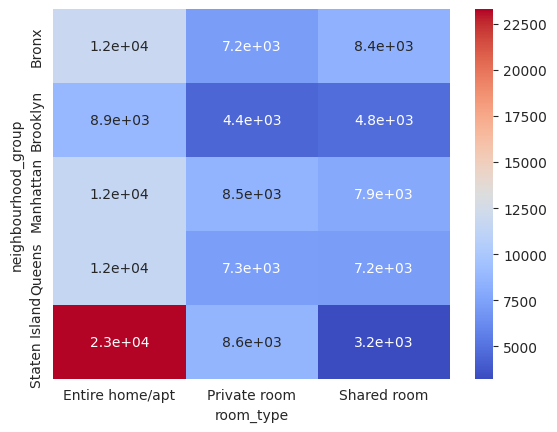

In [ ]:
pivot = airbnb_df.pivot_table(values='revenue', index='neighbourhood_group', columns='room_type', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm')
